In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df['Change'] = round(- 100 +(df["Close"] * 100 / df["Open"]),2)

In [5]:
is_same = df["Close"] == df["Adj Close"]
is_same.value_counts()

True    1009
Name: count, dtype: int64

In [6]:
df = df.drop("Adj Close", axis = 1)

In [7]:
df1 = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
 6   Change  1009 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
import matplotlib.pyplot as plt

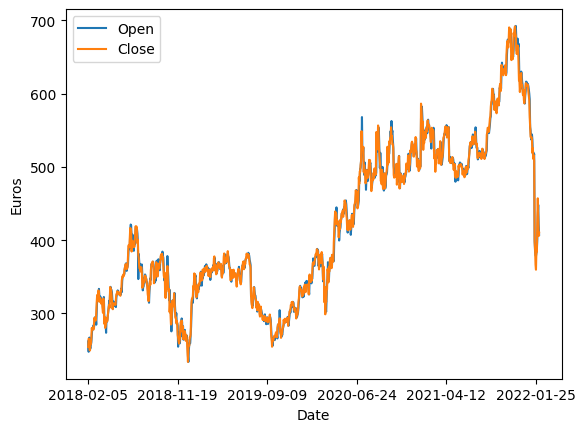

In [10]:
df.plot(x = "Date", y = ["Open","Close"], kind = "line")
plt.ylabel("Euros")
plt.show()

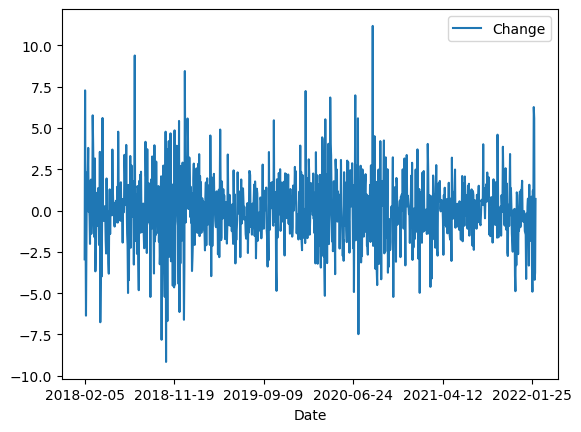

In [11]:
df.plot(x = "Date", y = "Change", kind = "line")
plt.show()

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
per_month = df.set_index("Date").groupby(pd.Grouper(freq = "M")).mean()
per_month = per_month.reset_index()

In [14]:
import seaborn as sns

C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

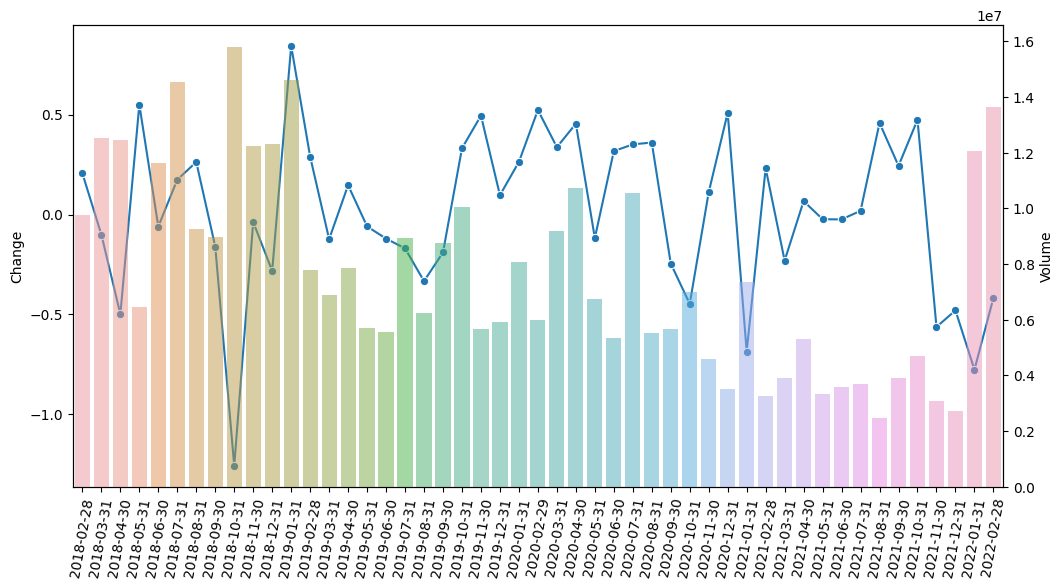

In [15]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = per_month["Change"] , marker='o', sort = False, ax=ax1)
plt.xticks(rotation = 80)
ax2 = ax1.twinx()

sns.barplot(data = per_month, x = per_month['Date'].dt.date, y = 'Volume', alpha = 0.5, ax = ax2)

plt.show()

In [16]:
pd.melt(per_month[["Close","Open","Date"]],["Date"])

,Date,variable,value
0,2018-02-28,Close,272.054705
1,2018-03-31,Close,312.228097
2,2018-04-30,Close,307.466192
3,2018-05-31,Close,331.536819
4,2018-06-30,Close,384.133336
...,...,...,...
93,2021-10-31,Open,639.220474
94,2021-11-30,Open,671.363334
95,2021-12-31,Open,611.568640
96,2022-01-31,Open,492.055000


C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

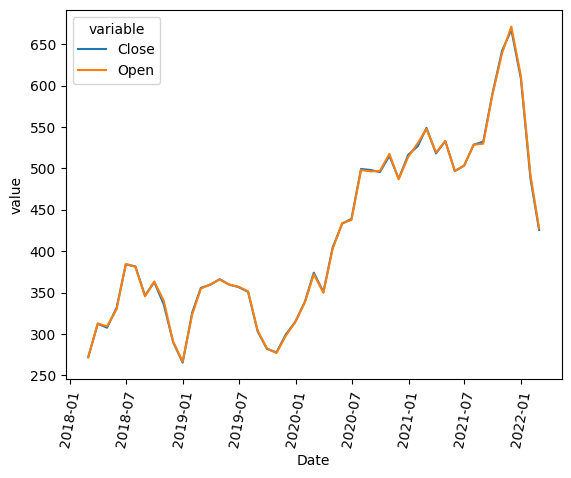

In [17]:
sns.lineplot(x = "Date", y = "value",hue = "variable", data = pd.melt(per_month[["Close","Open","Date"]],["Date"]))
plt.xticks(rotation = 80)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
df1 = df1.drop("Date",axis = 1)

In [20]:
X = df1.drop("Close",axis = 1)
y = df1["Close"]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred

array([684.70573658, 505.73851488, 515.31561163, 363.63611971,
       377.04435312, 317.93984902, 516.71342402, 496.81672224,
       357.77392449, 332.10592105, 314.39994896, 509.89091218,
       380.35017662, 509.86799351, 498.16011737, 507.07316865,
       358.97550634, 290.04218329, 501.77775138, 552.63821455,
       324.54278609, 441.6405945 , 356.44848073, 379.8272957 ,
       325.89362361, 328.50679375, 319.48774615, 513.05201914,
       635.49467148, 482.101815  , 369.9808335 , 518.32713956,
       282.10197814, 334.30259677, 434.46834153, 422.37708798,
       295.9804929 , 517.87101374, 421.16136551, 645.74357103,
       269.43089923, 350.62524712, 488.90685029, 368.63622272,
       303.37473378, 370.17560364, 366.59638865, 382.68547184,
       672.93240162, 472.88581974, 588.66907616, 382.19260344,
       665.06604499, 341.65246089, 417.32991356, 476.06780861,
       371.32336414, 266.65264201, 549.30711038, 494.24919727,
       291.65421679, 360.12076096, 326.5448409 , 452.23

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [36]:
Validation = [["MSE:",  mean_squared_error(y_test,y_pred)], ["RMAE:",  np.sqrt(mean_absolute_error(y_test,y_pred))],
              ["MAE:", mean_absolute_error(y_test,y_pred)], ["r2:",  r2_score(y_test,y_pred)]]

In [37]:
for name,val in Validation :
    val = val
    print(name, round(val,3))

MSE: 4.276
RMAE: 1.202
MAE: 1.444
r2: 1.0


In [38]:
def style():
    plt.figure(facecolor = "black",figsize = (15,10))
    ax = plt.axes()
    ax.tick_params(axis = "x", colors = "white")
    ax.tick_params(axis = "y", colors = "white")
    
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.set_facecolor("black")

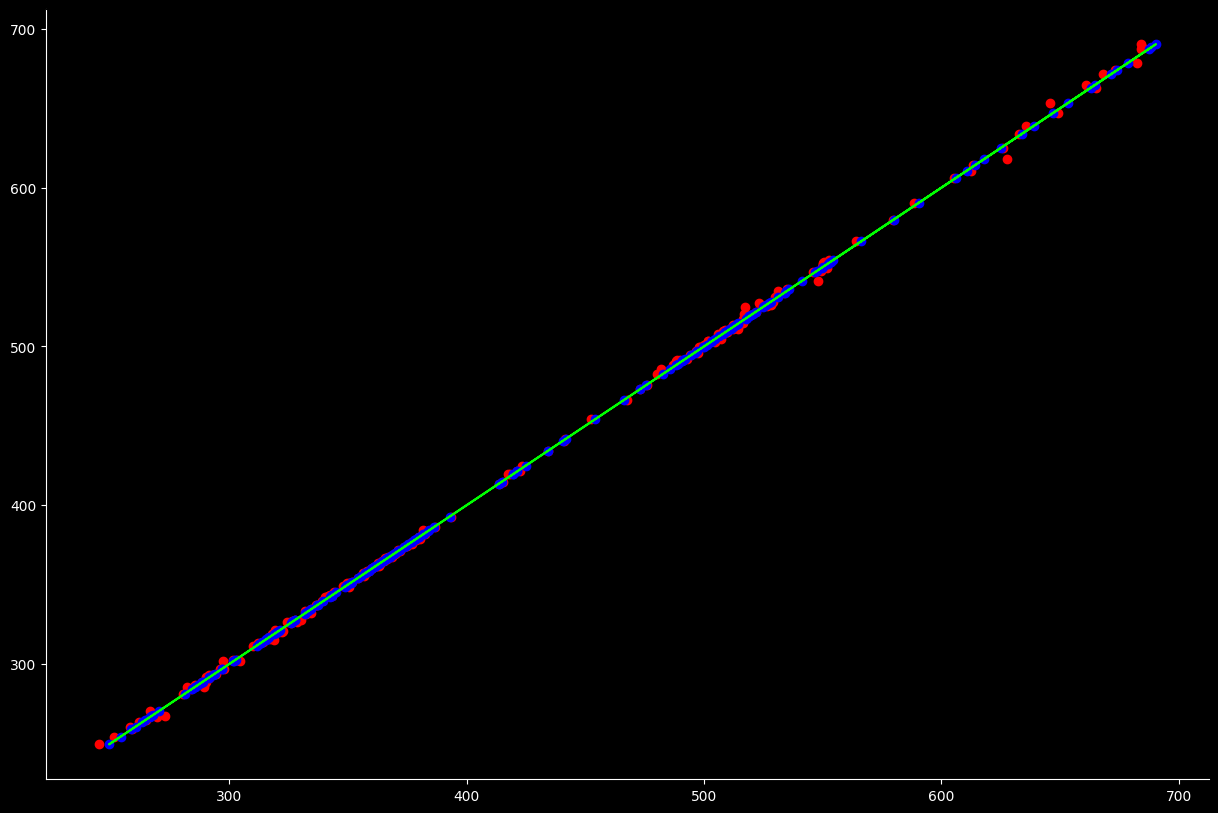

In [39]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')